In [70]:
import re

import pandas as pd
from matplotlib import pyplot as plt
import plotly.graph_objects as go

In [2]:
data = pd.read_csv("../data/temp_data/all_data.csv")

# Переделаю датасет до аугментации, чтобы убрать из названий нумерацию (том, эпизод и т.п.)

In [39]:
data.head()

,title,text,title_len
0,время - октябрь...,­­… сказки осенних вечеров ... монохромные во...,3
1,переписка,"здравствуйте, вы установили мессенджер max, по...",1
2,айвенго (спектакль) часть 3-я. ричард – львино...,радиоспектакль по роману.англия времен царство...,8
3,калевала,где можно найти наиболее полный литературный о...,1
4,янки из коннектикута при дворе короля артура,"новый, адаптированный перевод алексея козлова ...",7


In [40]:
def remove_complex_volume_numbers(title):
    """
    Удаляет сложные формы нумерации: (139 эпизод 2 том 2.)
    """
    if pd.isna(title):
        return title

    title_str = str(title)

    patterns = [
        r'\(?\s*\d+\s+(?:эпизод|серия|глава|часть)\s+\d+\s+(?:том|книга|т\.)\s*\d*\s*\.?\)?',
        r'\(?\s*\d+\s+(?:том|книга|т\.)\s+\d+\s+(?:эпизод|серия|глава|часть)\s*\d*\s*\.?\)?',

        r'\b\d+\s+\d+\s+(?:том|часть|книга|эпизод|серия)\b',
        r'\b(?:том|часть|книга|эпизод|серия)\s+\d+\s+\d+\b',

        r'\b\d+[-\.,]\s*\d+\s+(?:том|часть|книга)',
        r'\b(?:том|часть|книга)\s+\d+[-\.,]\s*\d+\b',
    ]

    cleaned_title = title_str
    for pattern in patterns:
        cleaned_title = re.sub(pattern, '', cleaned_title, flags=re.IGNORECASE)

    return cleaned_title

def clean_title_completely(title):
    """
    Полная очистка названия от всех видов нумерации
    """
    if pd.isna(title):
        return title

    cleaned = remove_complex_volume_numbers(title)

    basic_patterns = [
        r'\s*(?:том|часть|книга|т\.|vol\.?|эпизод|серия|глава|выпуск)\s*[ivxlcdm0-9]+',
        r'\s*[ivxlcdm0-9]+\s*(?:том|часть|книга|т\.|vol\.?|эпизод|серия|глава|выпуск)',
        r'\s*\d+[-\.,]?\s*(?:том|часть|книга)',
        r'\s*(?:том|часть|книга)[-\.,]?\s*\d+',
    ]

    for pattern in basic_patterns:
        cleaned = re.sub(pattern, '', cleaned, flags=re.IGNORECASE)

    cleaned = re.sub(r'\([^)]*\d+[^)]*\)', '', cleaned)
    cleaned = re.sub(r'\s+\d+\s*\.?$', '', cleaned)
    cleaned = re.sub(r'^\d+\s+', '', cleaned)

    cleaned = re.sub(r'\s+', ' ', cleaned)
    cleaned = re.sub(r'^\s+|\s+$', '', cleaned)
    cleaned = re.sub(r'[\(\)\[\]]', '', cleaned)
    cleaned = re.sub(r'[,\-\.:;]+$', '', cleaned)

    return cleaned


In [41]:
data["cleaned_title"] = data.title.apply(clean_title_completely)

In [42]:
changed_count = (data['title'] != data['cleaned_title']).sum()
print(f"Изменено названий: {changed_count} из {len(data)}")

Изменено названий: 5801 из 31122


In [44]:
data.title_len = data.cleaned_title.apply(lambda x: len(str(x).split()))

In [47]:
data.describe(include="O")

,title,text,cleaned_title
count,31122,31101,31122
unique,28839,30640,27913
top,латырь-камень бел-горюч... сказка?,; ; «энцикловикипедия»- -имена. посвящается ми...,латырь-камень бел-горюч... сказка?
freq,38,38,38


In [49]:
data = data[~data.text.duplicated(keep=False)].reset_index(drop=True)

In [50]:
data.describe(include="O")

,title,text,cleaned_title
count,30588,30588,30588
unique,28730,30588,27806
top,***,­­… сказки осенних вечеров ... монохромные во...,
freq,20,1,28


In [53]:
data = data[data.cleaned_title != ""].reset_index(drop=True)
data.describe(include="O")

,title,text,cleaned_title
count,30560,30560,30560
unique,28705,30560,27805
top,***,­­… сказки осенних вечеров ... монохромные во...,классика зарубежного рассказа №
freq,20,1,25


In [55]:
data.drop(columns=["title"], inplace=True)

In [57]:
data.rename(columns={"cleaned_title": "title"}, inplace=True)

In [59]:
data.head()

,text,title
0,­­… сказки осенних вечеров ... монохромные во...,время - октябрь
1,"здравствуйте, вы установили мессенджер max, по...",переписка
2,радиоспектакль по роману.англия времен царство...,айвенго спектакль-я. ричард – львиное сердце
3,где можно найти наиболее полный литературный о...,калевала
4,"новый, адаптированный перевод алексея козлова ...",янки из коннектикута при дворе короля артура


In [60]:
data.to_csv("../data/temp_data/all_data.csv", index=False)

# Анализ длины слов в названиях

In [61]:
title_counts = data['title'].value_counts()
title_counts.head(10)

title
классика зарубежного рассказа №             25
наследник ссср - фрагмент                   20
сергей степанов. постлюбовь. новый роман    20
выкладка                                    20
***                                         20
классика русского рассказа №                18
самая длинная история на свете              17
тихий дон                                   14
встреча                                     14
две жизни                                   13
Name: count, dtype: int64

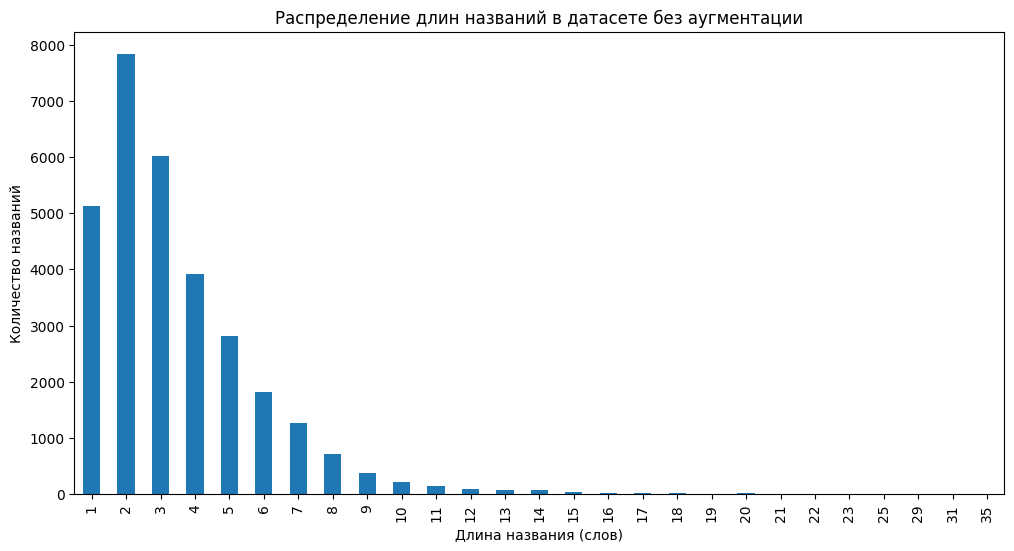

In [62]:
data["title_len"] = data.title.apply(lambda x: len(str(x).split()))

length_counts = data.groupby('title_len').size()

plt.figure(figsize=(12,6))
length_counts.plot(kind='bar')
plt.xlabel("Длина названия (слов)")
plt.ylabel("Количество названий")
plt.title("Распределение длин названий в датасете без аугментации")
plt.show()

In [63]:
train_df = pd.read_csv("../data/all_data_augmented/train_df.csv")

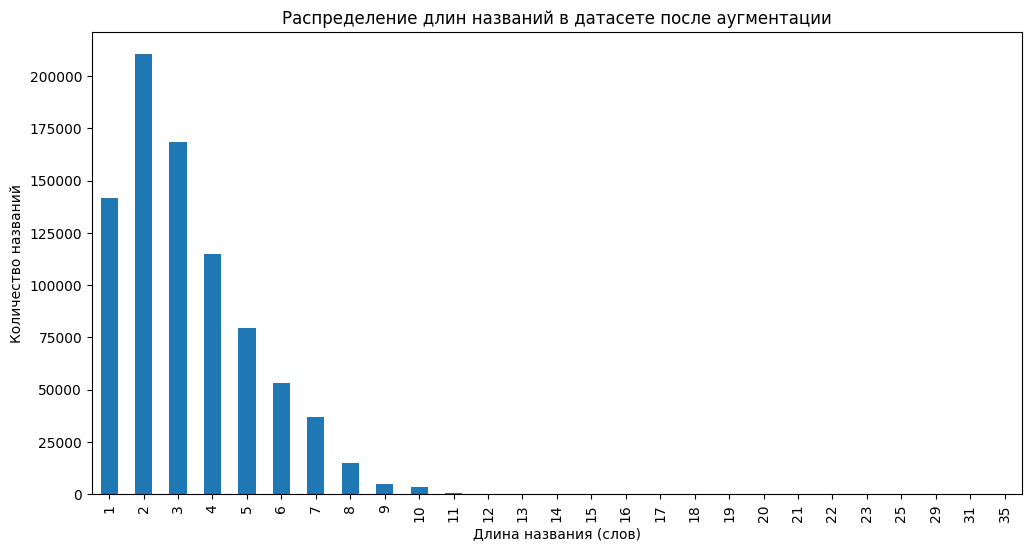

In [64]:
train_df["title_len"] = train_df.title.apply(lambda x: len(str(x).split()))

length_counts_aug = train_df.groupby('title_len').size()

plt.figure(figsize=(12,6))
length_counts_aug.plot(kind='bar')
plt.xlabel("Длина названия (слов)")
plt.ylabel("Количество названий")
plt.title("Распределение длин названий в датасете после аугментации")
plt.show()

In [66]:
val_df = pd.read_csv("../data/all_data_augmented/val_df.csv")

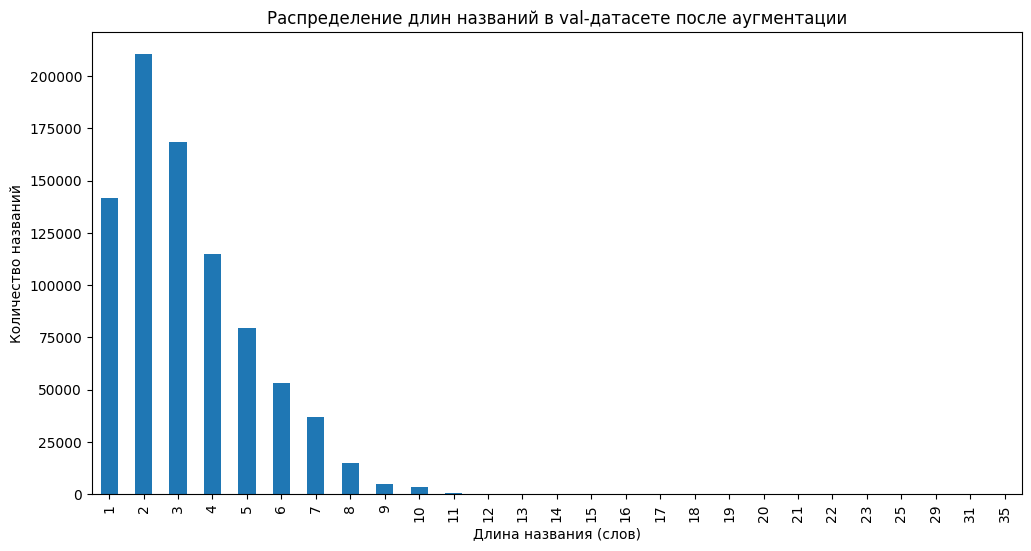

In [67]:
val_df["title_len"] = val_df.title.apply(lambda x: len(str(x).split()))

length_counts_aug_val = val_df.groupby('title_len').size()

plt.figure(figsize=(12,6))
length_counts_aug.plot(kind='bar')
plt.xlabel("Длина названия (слов)")
plt.ylabel("Количество названий")
plt.title("Распределение длин названий в val-датасете после аугментации")
plt.show()

In [74]:

fig = go.Figure()

fig.add_trace(go.Bar(
    x=length_counts.index,
    y=length_counts.values,
    name="Без аугментации",
    marker_color="blue"
))

fig.add_trace(go.Bar(
    x=length_counts_aug.index,
    y=length_counts_aug.values,
    name="train после аугментации",
    marker_color="orange"
))

fig.add_trace(go.Bar(
    x=length_counts_aug_val.index,
    y=length_counts_aug_val.values,
    name="test после аугментации",
    marker_color="green"
))

fig.update_layout(
    title="Сравнение распределения длин названий до и после аугментации",
    xaxis_title="Длина названия (слов)",
    yaxis_title="Количество названий",
    barmode="group",
    bargap=0.2,
    bargroupgap=0.1,
    width=1000,
    height=500
)

fig.show()

# Удалю строки, в которых длина названия > 10

In [83]:
data

,text,title,title_len
0,­­… сказки осенних вечеров ... монохромные во...,время - октябрь,3
1,"здравствуйте, вы установили мессенджер max, по...",переписка,1
2,радиоспектакль по роману.англия времен царство...,айвенго спектакль-я. ричард – львиное сердце,6
3,где можно найти наиболее полный литературный о...,калевала,1
4,"новый, адаптированный перевод алексея козлова ...",янки из коннектикута при дворе короля артура,7
...,...,...,...
30555,борис житков увлекался астрономией и фотографи...,что бывало,2
30556,"«этот сон видел бедный макар, который загнал с...",сон макара,2
30557,раннее утро предвещало жаркий день. солнечные ...,финал. золотое солнце правосудия,4
30558,святки – удивительный период времени: один год...,святочные истории,2


In [84]:
data = data[data.title_len <= 10].reset_index(drop=True)
max(data.title_len)

10

In [85]:
length_counts = data.groupby("title_len").size()

In [86]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=length_counts.index,
    y=length_counts.values,
    name="Датасет после чистки",
))

fig.show()

In [87]:
data.drop(columns=["title_len"], inplace=True)

In [88]:
data.describe()

,text,title
count,30068,30068
unique,30068,27314
top,­­… сказки осенних вечеров ... монохромные во...,классика зарубежного рассказа №
freq,1,25


In [89]:
data.to_csv("../data/clean_data_aug/all_data.csv", index=False)